### Utforskende data analyse av abalone datasett.

- I denne filen gjennomfører jeg utforskende data analyse av abalone datasettet, først med hoved hensyn for modellene jeg bruker i oblig3 (RandomForestRegressor, Ridge og Lasso) deretter
gjennomfører jeg videre analyse for neural network modellene i oblig4 der hvor jeg mener dette er hensiktsmessig. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge, Lasso
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from scikeras.wrappers import KerasRegressor

In [2]:
df = pd.read_csv(r"..\..\oblig3_og_4\abalone.data", sep=",", names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Beskrivelse av datasettet
- Hensikten med datasettet et å predikere alderen til et abalone skjell målt i antall ringer, uten å måtte dele opp abalonen og telle ringene manuelt.

- Featurene i datasette beskrive fysiske karaterestikke av et abalone skjell som kan måles uten å dele opp abalonen.

- Datasettet inneholder 8 feature kolonner. 7 av feature kolonnen inneholder numeriske verdier som er del av kontinuerlige tallrekker. 1 av feature kolonnene 'Sex' innehold en katagorisk beskrivelse av kjønn delt opp i "M" (Male), "F" (Female) og I (Infant).

- Target kolonnen inneholder tallverdier i en kontinuerlig tallrekke som beskrive alder i form av antall telte ringer.

- Datasette skal ikke inneholde noen manglende verdier.

In [6]:
df['Sex'] = pd.Series(LabelEncoder().fit_transform(df['Sex']))

- Transformasjon av feature kolonnen 'Sex' til numeriske verdier, slik at denne kan brukes i analysen.

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64


<Axes: xlabel='Rings'>

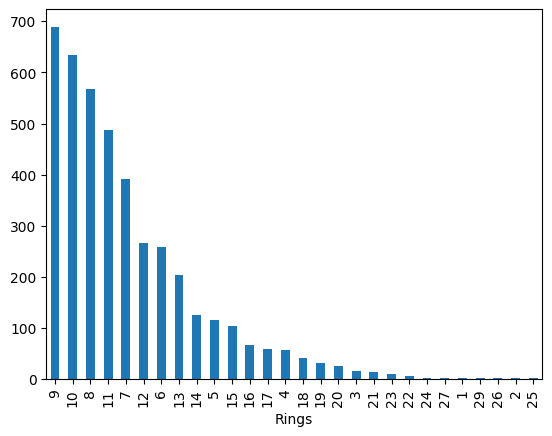

In [7]:
print(df['Rings'].value_counts())
df['Rings'].value_counts().plot.bar()

#### Telling av verdier i target kolonnen
- Som vi ser av denne telling er det så det få repsesntasjoner for vediene med høyest og færrest antall ringer, men siden disse verdiene er en del av en kontinuerlig tallrekke, samt ser ut til å være normalfordelt og dermed mest sansylig represntere en naturlig fordeling av alder/ringer for abaloner vil det ikke være henskisk messig å gjøre noe videre behandling av dette så lenge modellene ser ut til å prestere bra.

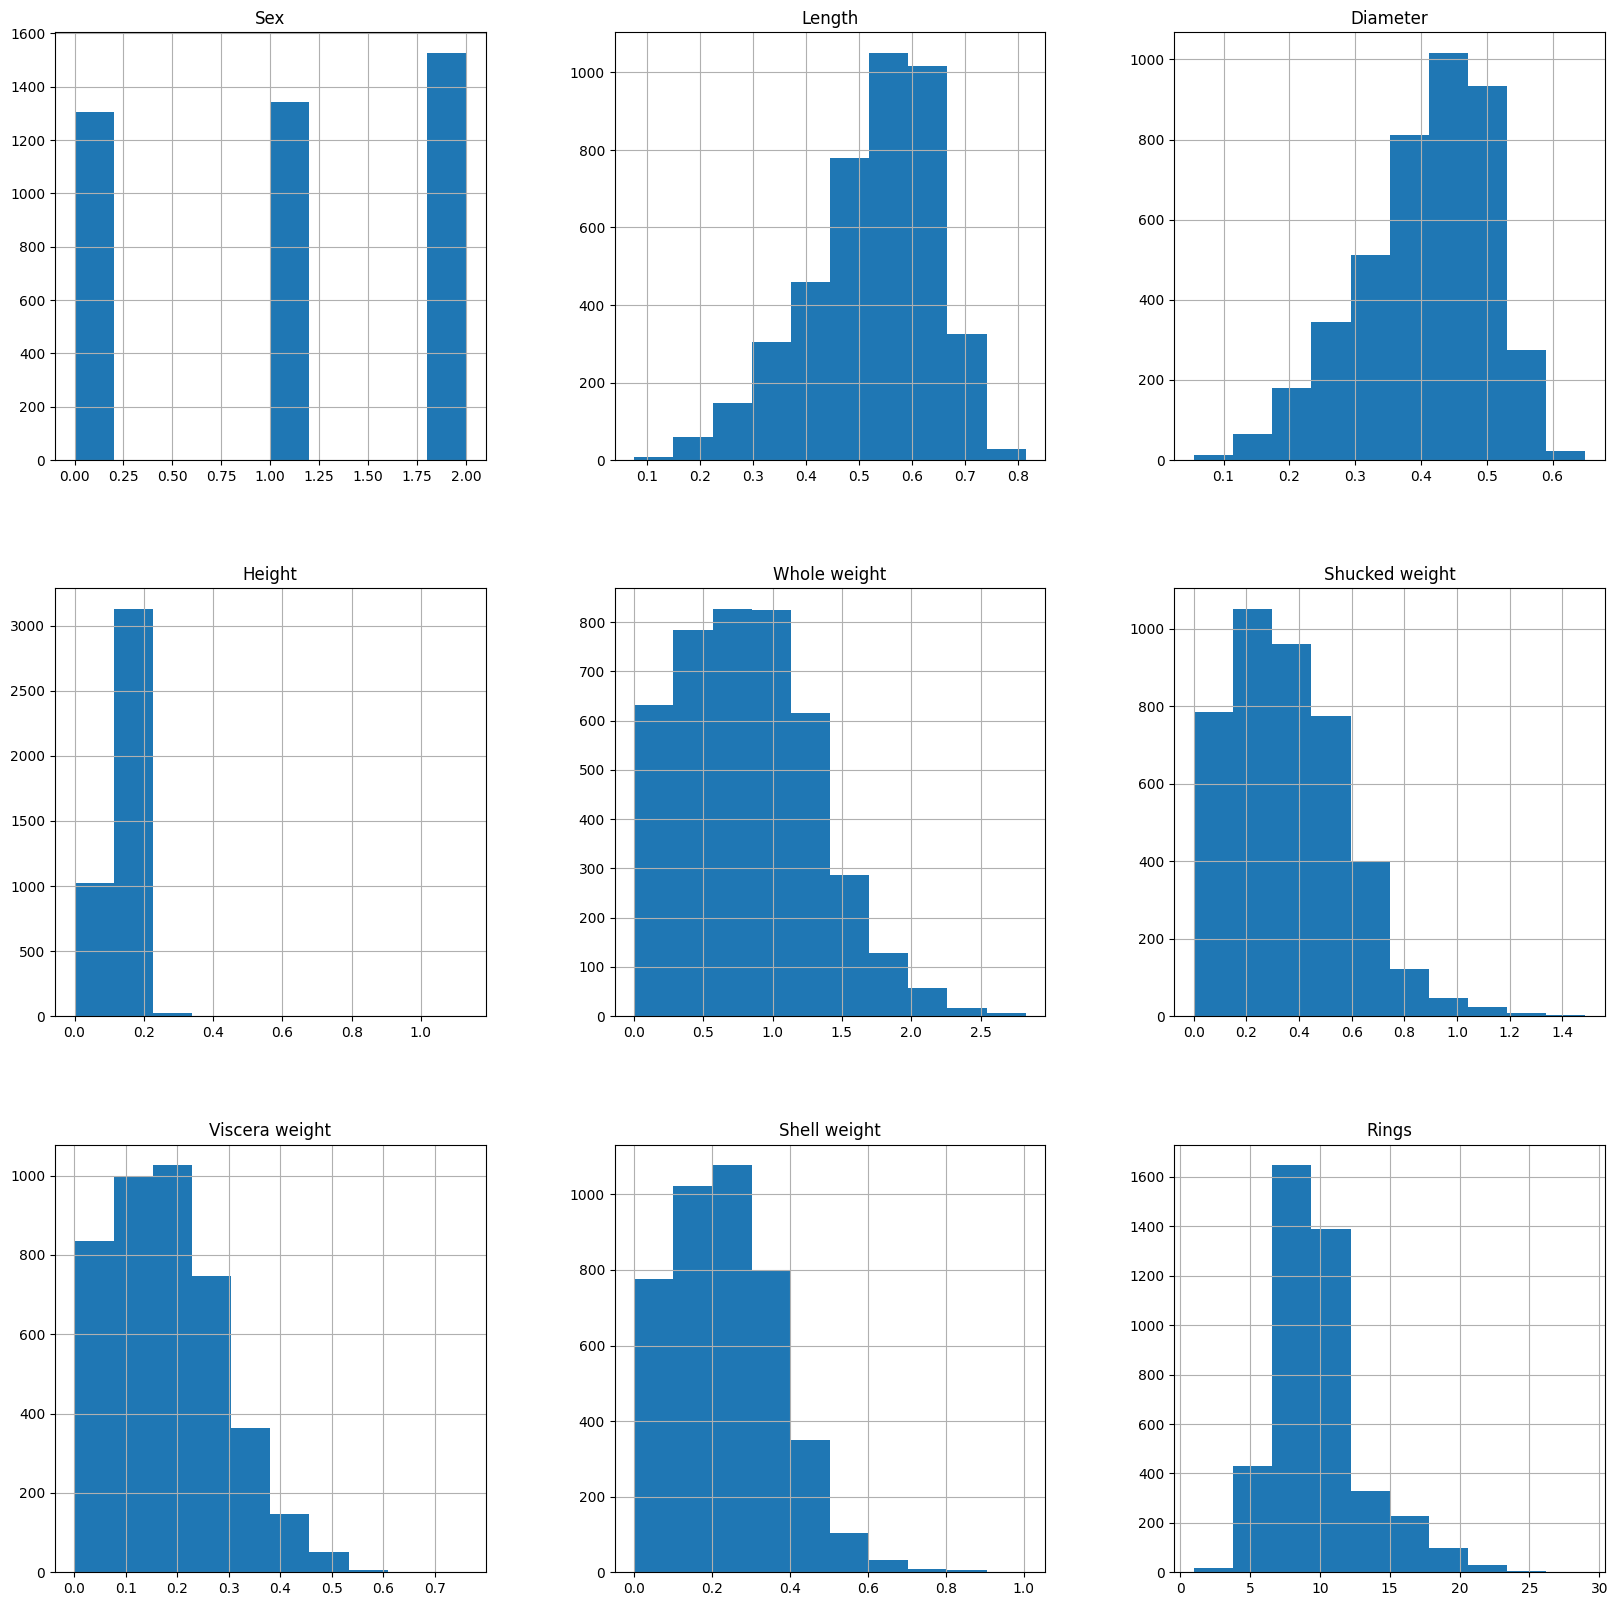

In [8]:
df.hist(figsize=(20,20))
plt.show()

#### Histogram av datasettet
- Som vi ser av histogrammet så er alle feature kolonnene og target kolonnen normalfordelt bortsett fra 'Sex' kolonnen, dette er i seg selv ikke nødvedig for regresjons analyser, men det tyder på at datasette er en del av en naturlig tilfeldig seleksjon.

- Vi ser også at det er noe forskjell i skalering mellom feature kolonnen så jeg kommer til å gjennomføre en standard mean skalering for å få alle feature verdiene på en tilsvarende skalering.

In [9]:
df_features = pd.DataFrame(StandardScaler().fit_transform(df.drop('Rings', axis=1)), columns=df.drop('Rings', axis=1).columns)
df_targets = df['Rings']

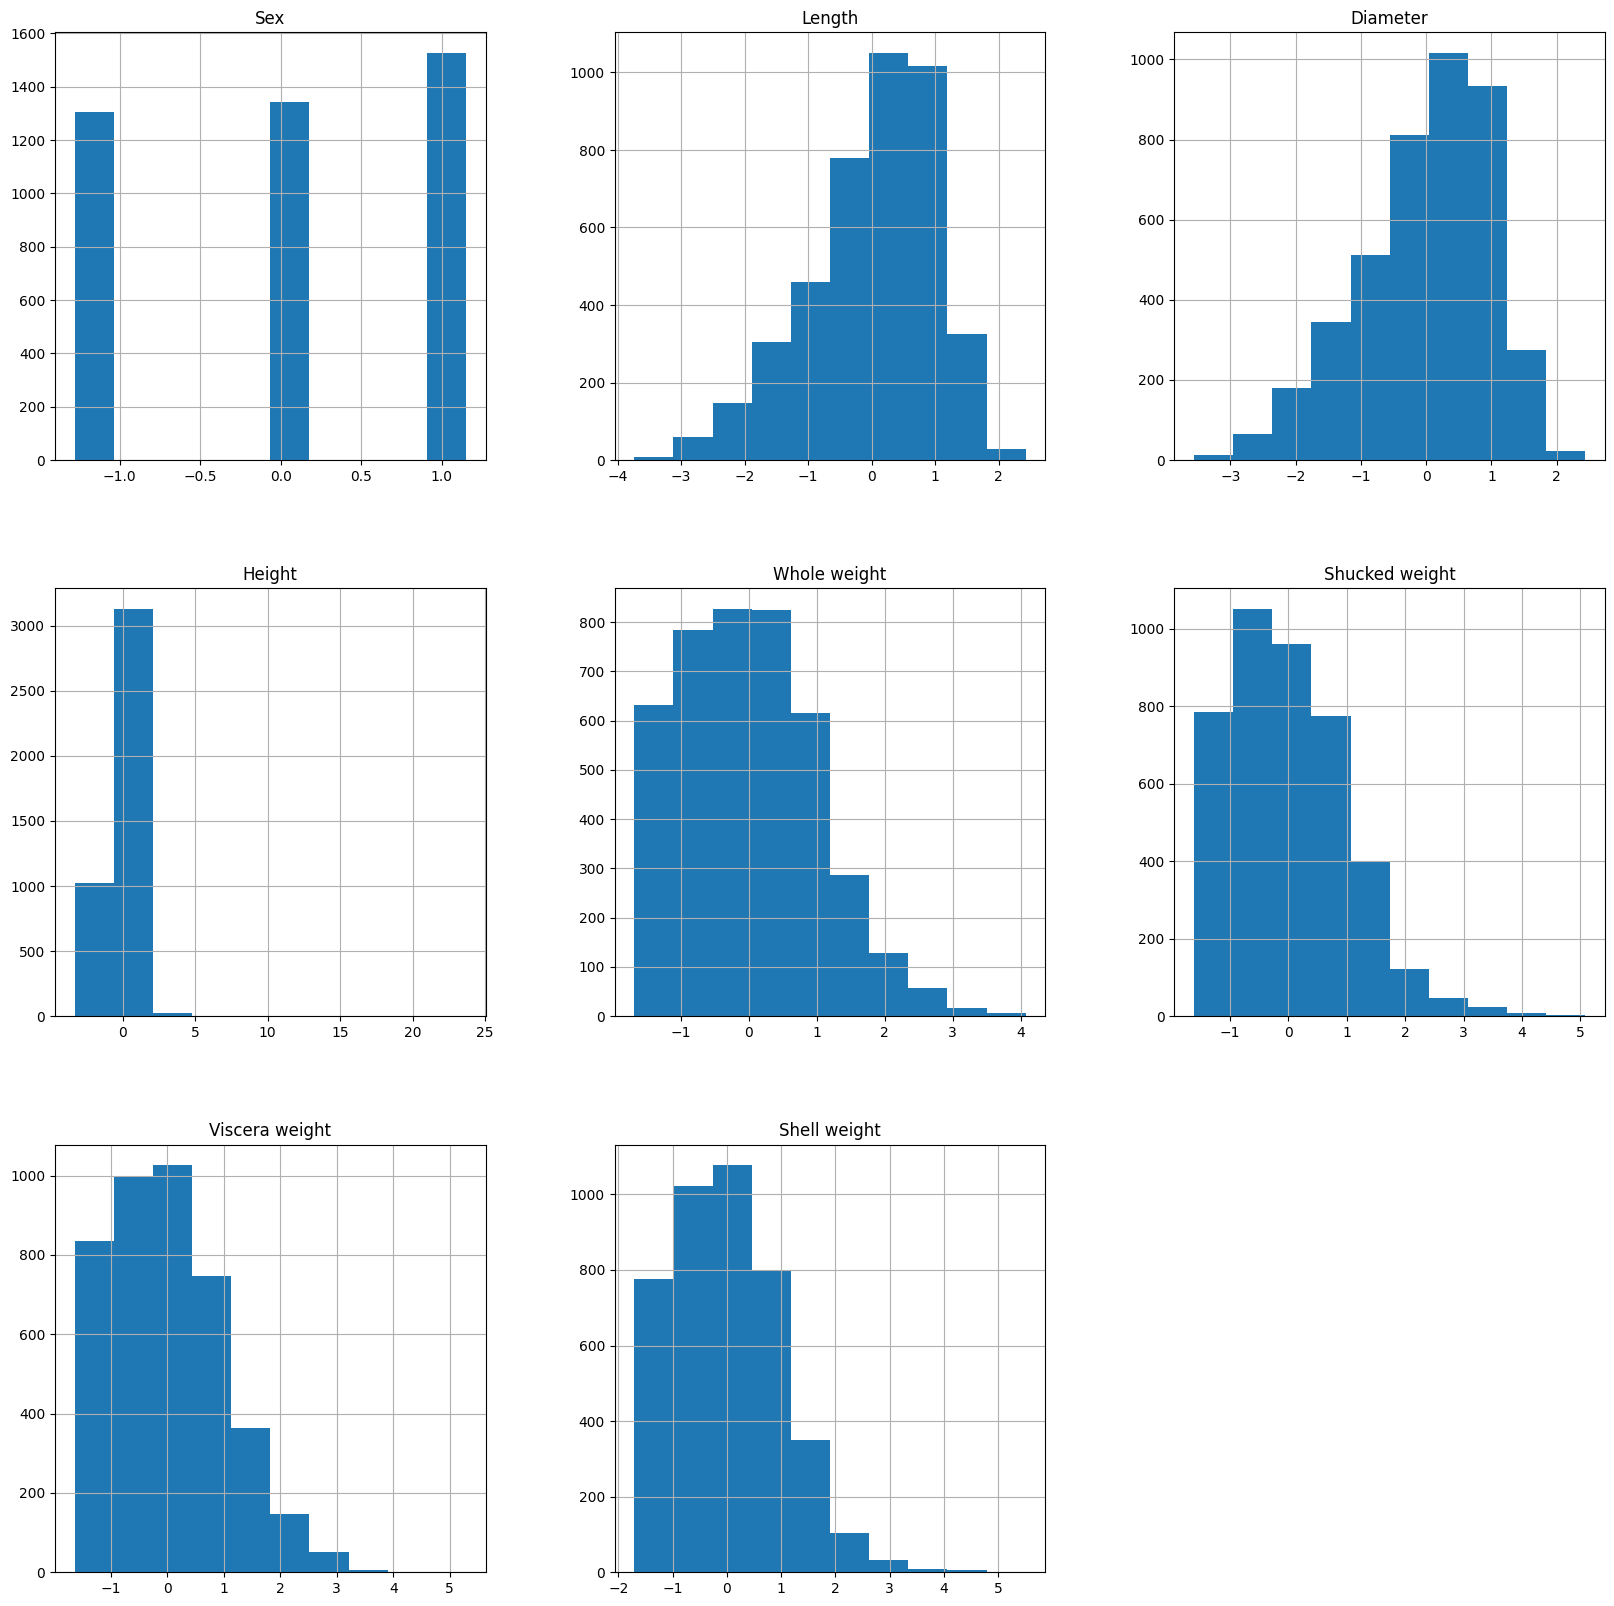

In [10]:
df_features.hist(figsize=(20,20))
plt.show()

<Axes: >

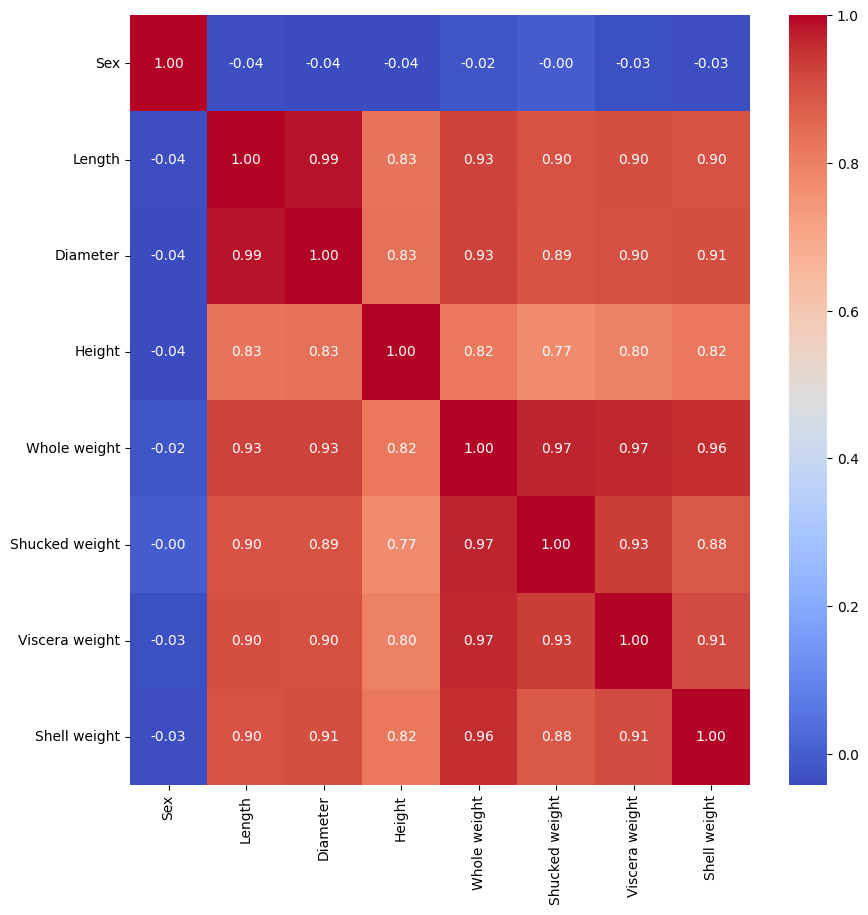

In [11]:
df_correlation = df_features.corr()
plt.figure(figsize=(10,10))
sb.heatmap(df_correlation, annot=True, cmap="coolwarm", fmt=".2f")

#### Korrelasjon
- Som vi ser av korrelasjons plotet er det betydelig korrelasjon mellom flere av feature kolonene, det vil derfor være hensikts messig å bruke PCA til å undersøken om det kan gi bedre prestasjon for modellene vi skal bruke ved samle noen eller flere av feature kolonnene.

In [12]:
features_pca3 = pd.DataFrame(PCA(n_components=3).fit_transform(df_features))
features_pca4 = pd.DataFrame(PCA(n_components=4).fit_transform(df_features))
features_pca5 = pd.DataFrame(PCA(n_components=5).fit_transform(df_features))
features_pca6 = pd.DataFrame(PCA(n_components=6).fit_transform(df_features))
features_pca7 = pd.DataFrame(PCA(n_components=7).fit_transform(df_features))

In [13]:
print(f'PCA 3 scores: {cross_val_score(RandomForestRegressor(), X=features_pca3, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 4 scores: {cross_val_score(RandomForestRegressor(), X=features_pca4, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 5 scores: {cross_val_score(RandomForestRegressor(), X=features_pca5, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 6 scores: {cross_val_score(RandomForestRegressor(), X=features_pca6, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 7 scores: {cross_val_score(RandomForestRegressor(), X=features_pca7, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'Regular scores: {cross_val_score(RandomForestRegressor(), X=df_features, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')

PCA 3 scores: [-12.08727129  -4.27143481  -6.6355024   -4.78625222  -4.5480509 ]
PCA 4 scores: [-12.24446651  -4.03005012  -6.54226323  -4.58899677  -4.57744695]
PCA 5 scores: [-9.92953911 -2.84856603 -5.63061066 -3.69906263 -3.73100192]
PCA 6 scores: [-9.95697847 -2.70940096 -5.4663879  -3.63678707 -3.71482263]
PCA 7 scores: [-9.77699462 -2.74856065 -5.42829808 -3.5656812  -3.7397115 ]
Regular scores: [-9.58161328 -2.83219797 -5.44591725 -3.65340168 -3.88566036]


In [14]:
print(f'PCA 4 scores: {cross_val_score(Ridge(), X=features_pca4, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 5 scores: {cross_val_score(Ridge(), X=features_pca5, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 6 scores: {cross_val_score(Ridge(), X=features_pca6, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 3 scores: {cross_val_score(Ridge(), X=features_pca3, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 7 scores: {cross_val_score(Ridge(), X=features_pca7, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'Regular scores: {cross_val_score(Ridge(), X=df_features, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')

PCA 4 scores: [-14.36170843  -4.45046166  -9.69351737  -4.8685069   -4.89871416]
PCA 5 scores: [-10.83673305  -3.14601093  -6.30613819  -3.77861764  -4.31282002]
PCA 6 scores: [-10.68234614  -3.14320069  -6.16208442  -3.81924622  -4.25169649]
PCA 3 scores: [-14.45479047  -4.39476127  -9.89573004  -4.83273955  -4.893031  ]
PCA 7 scores: [-10.64338044  -3.14627466  -6.14628697  -3.79831438  -4.26973702]
Regular scores: [-10.10506009  -3.15034     -5.95099964  -3.87905257  -4.0760345 ]


In [15]:
print(f'PCA 3 scores: {cross_val_score(Lasso(), X=features_pca3, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 4 scores: {cross_val_score(Lasso(), X=features_pca4, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 5 scores: {cross_val_score(Lasso(), X=features_pca5, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 6 scores: {cross_val_score(Lasso(), X=features_pca6, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'PCA 7 scores: {cross_val_score(Lasso(), X=features_pca7, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')
print(f'Regular scores: {cross_val_score(Lasso(), X=df_features, y=df_targets, cv=5, scoring='neg_mean_squared_error')}')

PCA 3 scores: [-16.2311783   -4.50212258  -8.38740812  -5.37319139  -5.28085011]
PCA 4 scores: [-16.2311783   -4.50212258  -8.38740812  -5.37319139  -5.28085011]
PCA 5 scores: [-16.2311783   -4.50212258  -8.38740812  -5.37319139  -5.28085011]
PCA 6 scores: [-16.2311783   -4.50212258  -8.38740812  -5.37319139  -5.28085011]
PCA 7 scores: [-16.2311783   -4.50212258  -8.38740812  -5.37319139  -5.28085011]
Regular scores: [-16.57085264  -4.18810246  -8.42026249  -5.24147466  -5.27729511]


#### PCA testing
- For å test ut som PCA kan gi bedre resultater for treningen av datasettet så har jeg bruket PCA til å samle featurene i datasettet. Jeg valgt å test dette over en range mellom 3-7 utput features for å se om dette gir noen positiv effekt på prestasjonen til modellene for dette datasettet.

- Jeg har brukt cross_val_score til å gjennomføre en enkel pre og post test for prestasjonen til modellene før og etter bruk av PCA.

- Ut i fra resultatene ser det ikke ut til være noen forbedringer for prestasjonen til modellene ved bruk av PCA, så jeg kommer derfor ikke til å bruke dette videre i analysen av datasettet. 

- P.S det er hvert å merke seg at jeg har bruk negativ mean squared error i cross_val_score, da dette er nødvendig for bruk av denne typen metricen i cross_val_score for at den skal optimalisere seg riktig. I forhold til tolkning av resultatene kan vi derfor legge på et positivt forteg forann resultatene i sted for den negative verdien.

### Oblig 4

- For neural network modellene i oblig 4 kommer jeg til å gjennomføre en sammeligning med PCA på samme måte som jeg har gjort for de andre modellene i oblig3. Utover dette mener jeg at analysere jeg har gjennomført for datasette opp mot modellen i oblig3 vil være dekkende også for modellen i oblig4.

In [20]:
def create_model(input=8):
    model = Sequential()
    model.add(Input(shape=(input,)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam') #'mean_squared_error', 
    return model

In [17]:
regular_scores = cross_val_score(KerasRegressor(model=create_model(8), verbose=0), X=df_features, y=df_targets, scoring='neg_mean_squared_error')

c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-p

In [25]:
pca3_score = cross_val_score(KerasRegressor(model=create_model(3), verbose=0), X=features_pca3, y=df_targets, scoring='neg_mean_squared_error')
pca4_score = cross_val_score(KerasRegressor(model=create_model(4), verbose=0), X=features_pca4, y=df_targets, scoring='neg_mean_squared_error')
pca5_score = cross_val_score(KerasRegressor(model=create_model(5), verbose=0), X=features_pca5, y=df_targets, scoring='neg_mean_squared_error')
pca6_score = cross_val_score(KerasRegressor(model=create_model(6), verbose=0), X=features_pca6, y=df_targets, scoring='neg_mean_squared_error')
pca7_score = cross_val_score(KerasRegressor(model=create_model(7), verbose=0), X=features_pca7, y=df_targets, scoring='neg_mean_squared_error')

c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\hallo\Documents\GitHub\praktisk-maskinlering\.venv\Lib\site-p

In [27]:
print(f'PCA 3 scores:  {pca3_score}')
print(f'PCA 4 scores:  {pca4_score}')
print(f'PCA 5 scores:  {pca5_score}')
print(f'PCA 6 scores:  {pca6_score}')
print(f'PCA 7 scores:  {pca7_score}')
print(f'Regular scores:  {regular_scores}')

PCA 3 scores:  [-70.82331085 -23.73358917 -49.94163132 -36.34420013 -37.34157181]
PCA 4 scores:  [-66.64815521 -22.62527275 -44.06110764 -31.69309807 -32.78240967]
PCA 5 scores:  [-67.91583252 -21.66382599 -45.83707428 -32.95165253 -32.89302826]
PCA 6 scores:  [-72.26589966 -25.46830559 -49.27269745 -36.56826019 -37.92507935]
PCA 7 scores:  [-72.46160889 -24.97539902 -48.61968231 -36.44989395 -36.65980148]
Regular scores:  [-48.41207123 -18.40613174 -33.6398201  -22.56778336 -24.9510994 ]


#### PCA

- Som vi kan se av resultaten så ser det ikke ut til at PCA gir noe bedre reultater for den enkel neural network modellen, så jeg kommer derfor kun til å bruke de opprinelige feature verdiene i den videre treningen av modellene.
